In [19]:
from IPython.display import Image
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt
%matplotlib inline

# Fair Coin example with 0.5Beta(20,3) + 0.5Beta(3,20) prior

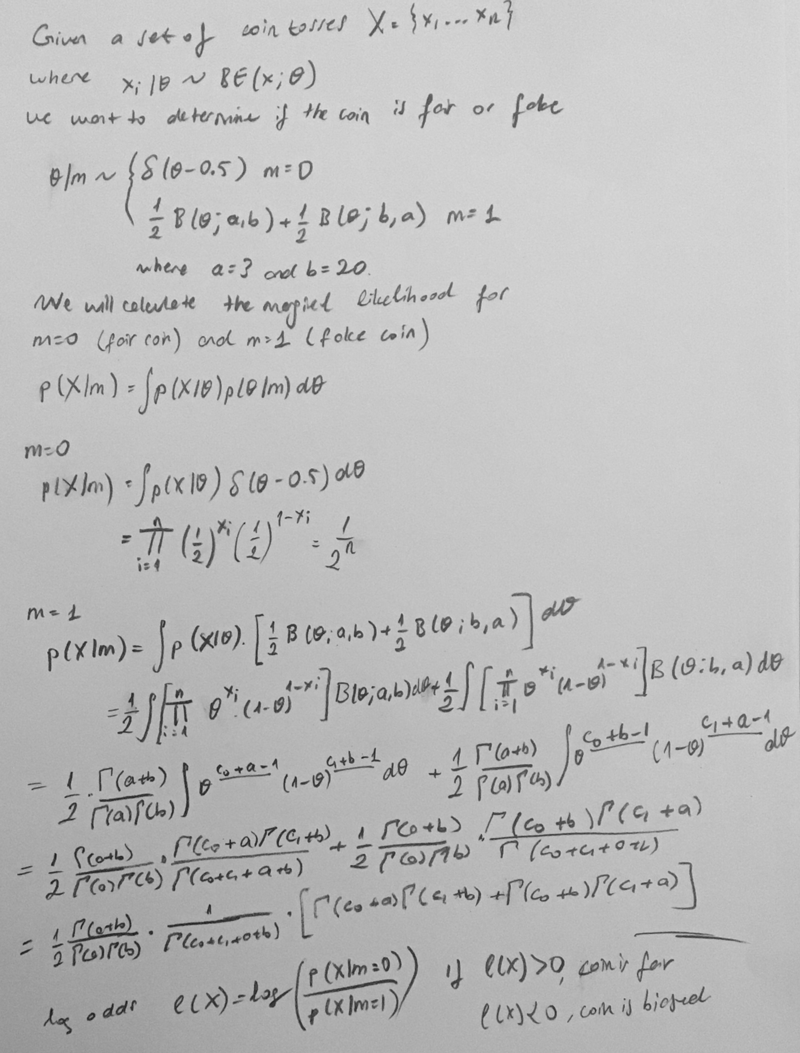

In [2]:
Image(filename='fair-coin.png')

In [41]:
def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake = 0.5 * (sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) +  sps.gammaln(c_0+a) + sps.gammaln(c_1+b) - sps.gammaln(N+a + b) )\
    +0.5 * (sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) +  sps.gammaln(c_0+b) + sps.gammaln(c_1+a) - sps.gammaln(N+a + b) )
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 2
# Number of Ones
c_1 = 18

# Prior
a = 3
b = 20

print('log_odds = ', log_odds(c_0, c_1, a, b) )

('log_odds = ', 0.3585769822874969)


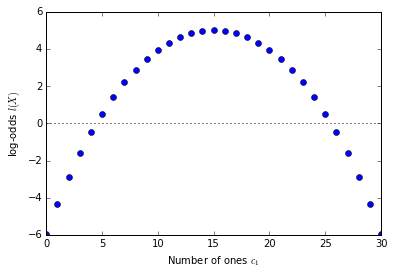

In [42]:
a = 3
b = 20
N = 30

l = np.zeros(N+1)
for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)
    
plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

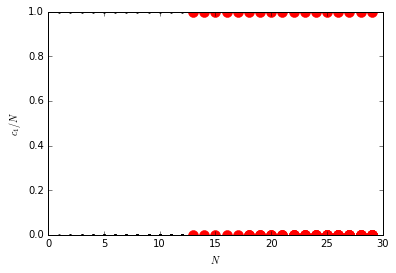

In [43]:
a = 3
b = 20

for N in range(1, 30):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

### $\propto$ Prior Dist

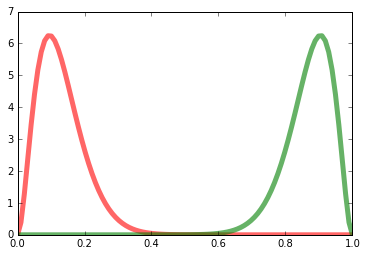

In [40]:
from scipy.stats import beta
a = 3
b = 20
x = np.linspace(0,1, 100)
x2 = np.linspace(0,1, 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6)
plt.plot(x2, beta.pdf(x2, b, a),'g-', lw=5, alpha=0.6)
plt.show()

### Our previous prior was uniform

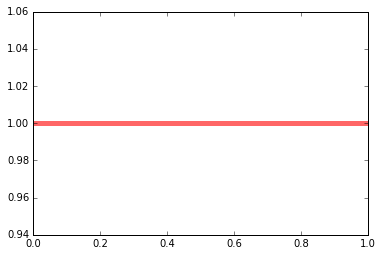

In [44]:
x = np.linspace(0,1, 100)
plt.plot(x, beta.pdf(x, 1, 1),'r-', lw=5, alpha=0.6)

# Question 74 Changepoint Model

\begin{eqnarray}
\gamma \sim \mathcal{B}(1,1) \\
\theta \sim \mathcal{B}(1,1)
\end{eqnarray}

\begin{eqnarray}
x_i & \sim & \left\{ \begin{array}{cc} \mathcal{BE}(x_i;\gamma) & i <= m\\ \mathcal{BE}(x_i; \theta) & i > m \end{array} \right.
\end{eqnarray}

We have $x_i \in {0,1} $ from $i=1$ to $i=n$, where $n=50$ .Changepoint position m is an integer between 1 and n-1. The change point splits the data into 2 segments. These segments consist data from $1:m$ and $m:n$.

As the segments are independent of each other we can state that;

\begin{eqnarray}
p(X | m,\gamma,\theta) = p(X_{1:m}|\gamma)p(X_{m:n}|\theta)
\end{eqnarray}

\begin{eqnarray}
X_1 = X_{1:m}\\ X_2 = X_{m:n}\\
\propto \mathcal{BE}(X_1;\gamma)\mathcal{BE}(X_2;\theta) \\
\propto \gamma^{c_0}(1-\gamma)^{c_1}  \theta^{d_0}(1-\theta)^{d_1} \\
\propto \dfrac{\Gamma(c_0 + a)\Gamma(c_1 + b) }{\Gamma(c_0+c_1+a+b)}  \dfrac{\Gamma(d_0 + a)\Gamma(d_1 + b) }{\Gamma(d_0+d_1+a+b)}\\
\end{eqnarray}

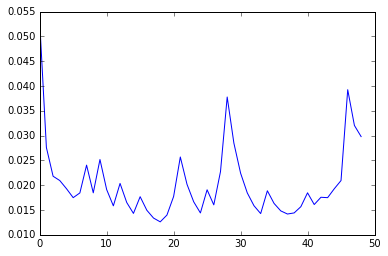

In [103]:
np.random.seed(12345)
N = 50
X = np.random.randint(2, size=N)

# test array :)
#X = np.array( [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] )

dist = []
for i in range(1,N):
    c_1 = X[0:i].sum()
    c_0 = i - c_1
    d_1 = X[i:N].sum()
    d_0 = (N-i)-d_1
    
    prob = (sps.gamma(1+c_0)*sps.gamma(1+c_1)/sps.gamma(2+i))*\
           (sps.gamma(1+d_0)*sps.gamma(1+d_1)/sps.gamma(2+(N-i)))
    dist.append(prob)

dist = np.array(dist)
dist = dist / dist.sum()
plt.plot(dist)